# Import Necessary Libraries

In [1]:
import re
import os
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords

# Statistical Analysis

In [2]:
newdf = pd.read_csv("../data/processed/AIArabic_binary_clean.csv")

In [3]:
print(newdf["clean_text_stemmed"].isnull().sum())


0


In [4]:
print(newdf[newdf["clean_text_stemmed"].isnull()])


Empty DataFrame
Columns: [text, label, clean_text, clean_text_stemmed]
Index: []


In [5]:
newdf.isnull().sum()

text                  0
label                 0
clean_text            0
clean_text_stemmed    0
dtype: int64

C:\Users\hanee\AppData\Local\Temp\ipykernel_24740\3846805866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=newdf, x='label', palette='viridis')


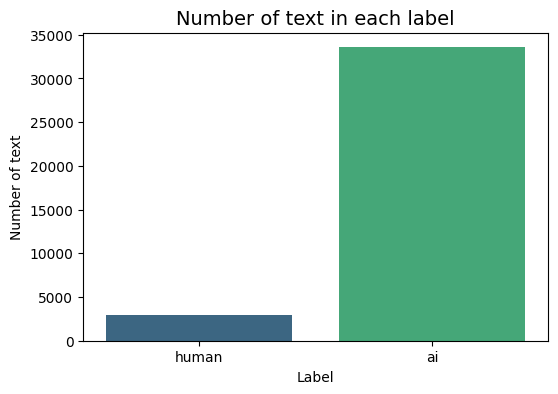

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=newdf, x='label', palette='viridis')
plt.title("Number of text in each label", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Number of text")
save_path = "../reports/figures/NumberOfText.png"
plt.savefig(save_path, bbox_inches="tight", dpi=300)
plt.show()

## Calculating the Average Word Length

In [7]:
def avg_word_length(text):
    words = text.split()
    return np.mean([len(w) for w in words]) if len(words) > 0 else 0

## Calculating Sentence Length

In [8]:
def sentence_length(text):
    return len(text.split())

## Calculating Vocabulary Richness

In [9]:
def type_token_ratio(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

In [10]:
newdf["avg_word_len"] = newdf["clean_text_stemmed"].apply(avg_word_length)
newdf["sentence_len"] = newdf["clean_text_stemmed"].apply(sentence_length)
newdf["type_token_ratio"] = newdf["clean_text_stemmed"].apply(type_token_ratio)

In [11]:
newdf["avg_word_len"]

0        3.105263
1        3.152381
2        3.459770
3        3.189474
4        3.436364
           ...   
36535    3.333333
36536    3.292453
36537    3.423077
36538    3.255319
36539    3.256410
Name: avg_word_len, Length: 36540, dtype: float64

In [12]:
newdf["sentence_len"] 

0         95
1        105
2        174
3         95
4        110
        ... 
36535     84
36536    106
36537    104
36538     94
36539    117
Name: sentence_len, Length: 36540, dtype: int64

In [13]:
newdf["type_token_ratio"]

0        0.736842
1        0.790476
2        0.683908
3        0.694737
4        0.900000
           ...   
36535    0.809524
36536    0.735849
36537    0.750000
36538    0.765957
36539    0.709402
Name: type_token_ratio, Length: 36540, dtype: float64

## Calculate the Mean for each lables

In [14]:
analysisMean = newdf.groupby("label")[["avg_word_len", "sentence_len", "type_token_ratio"]].mean()

In [15]:
analysisMean

,avg_word_len,sentence_len,type_token_ratio
label,,,
ai,3.435916,86.650739,0.738284
human,3.441458,97.761029,0.765075


# Visualization

## Word Cloud for Human and AI

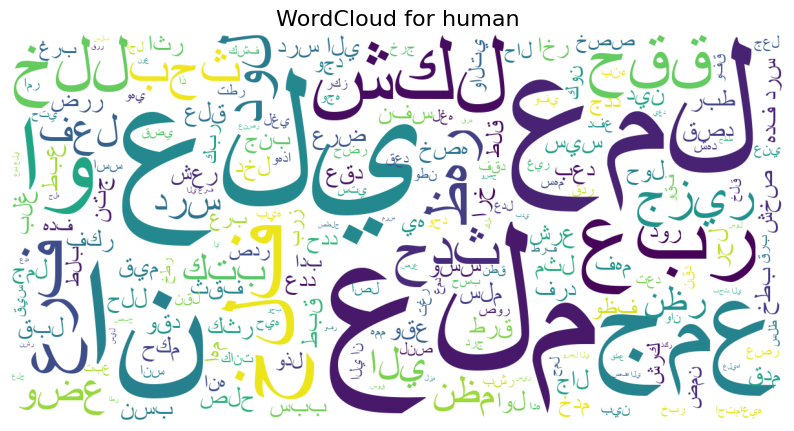

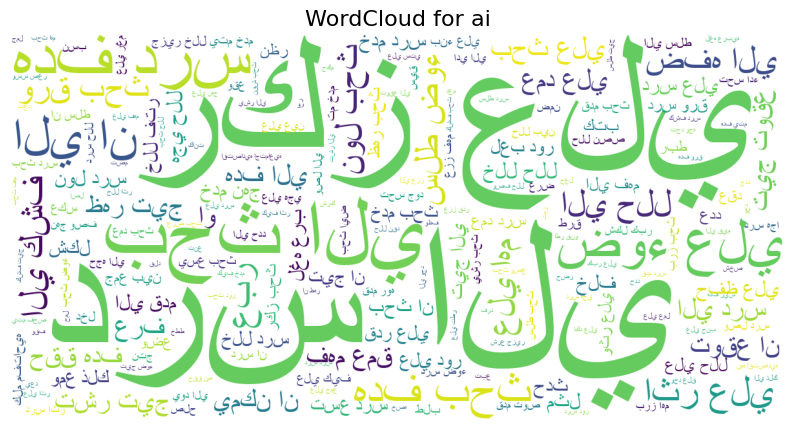

In [16]:
def plotWordCloud(label,df, column="clean_text_stemmed"):
    save_path = f"../reports/figures/wordcloud_{label}.png"
    if os.path.exists(save_path):
        print(f"WordCloud already exists: {save_path}")
        return
    data = " ".join(df[df['label'] == label][column])
    wordcloud = WordCloud(
        background_color='white', max_words=200, max_font_size=100, scale=3, random_state=1,
        font_path="arial").generate(data)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.title(f"WordCloud for {label}", fontsize=16)
    plt.imshow(wordcloud)
    plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.show()
 
plotWordCloud("human",newdf)
plotWordCloud("ai",newdf)           

## N-Gram

C:\Users\hanee\AppData\Local\Temp\ipykernel_24740\2946467425.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels,palette="viridis")


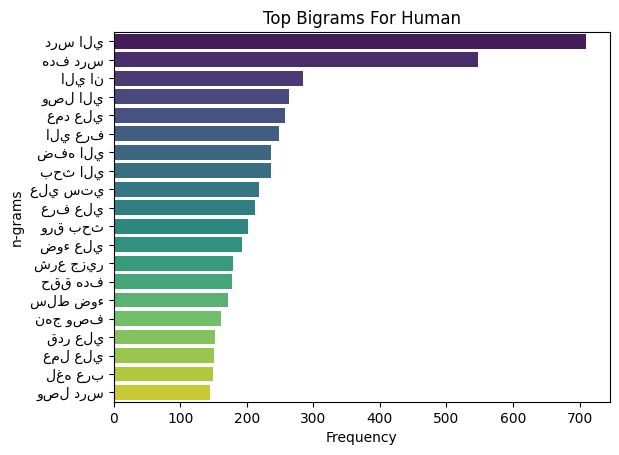

C:\Users\hanee\AppData\Local\Temp\ipykernel_24740\2946467425.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels,palette="viridis")


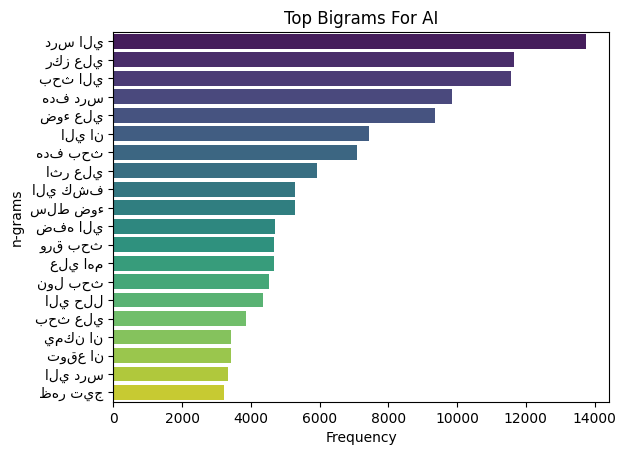

In [17]:
def plotNgrams(texts, n, top_k, title="", filename=None):
    if filename:
        save_path = f"../reports/figures/{filename}.png"
        if os.path.exists(save_path):
            print(f"Common Terms figure already exists: {save_path}")
            return
    all_tokens = " ".join(texts).split()
    n_grams = ngrams(all_tokens, n)
    freq_dist = Counter(n_grams).most_common(top_k)
    labels = [" ".join(i) for i, _ in freq_dist]
    counts = [count for _, count in freq_dist]
    sns.barplot(x=counts, y=labels,palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("n-grams")
    if filename:
        save_path = f"../reports/figures/{filename}.png"
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.show()

plotNgrams(newdf[newdf['label']=="human"]["clean_text_stemmed"], n=2, top_k=20, title="Top Bigrams For Human",filename="topBigramsHuman")
plotNgrams(newdf[newdf['label']=="ai"]["clean_text_stemmed"], n=2, top_k=20, title="Top Bigrams For AI",filename="topBigramsAI")


# Lexical Analysis

## Calculating the Ratio of Stop Word 

In [18]:
def stopwordRatio(text):
    stops = set(stopwords.words("arabic"))
    words = text.split()
    if len(words) == 0:
        return 0
    stopword_count = len([w for w in words if w in stops])
    return stopword_count / len(words)

In [19]:
newdf["stopword_ratio"] = newdf["clean_text_stemmed"].apply(stopwordRatio)
analysisStopword = newdf.groupby("label")["stopword_ratio"].mean()

In [20]:
analysisStopword

label
ai       0.045656
human    0.052127
Name: stopword_ratio, dtype: float64

## Calculating the Ratio of Punctuation

In [21]:
def punctuationRatio(text):
    punctuation_count = len([w for w in text if w in string.punctuation])
    return punctuation_count / max(len(text), 1)

In [22]:
newdf["punctuation_ratio"] = newdf["clean_text_stemmed"].apply(punctuationRatio)
analysisPunctuation = newdf.groupby("label")["punctuation_ratio"].mean()

In [23]:
analysisPunctuation

label
ai       0.015401
human    0.012330
Name: punctuation_ratio, dtype: float64

## Calculating the Mean of Frequent Term

C:\Users\hanee\AppData\Local\Temp\ipykernel_24740\1456529549.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels,palette="viridis")


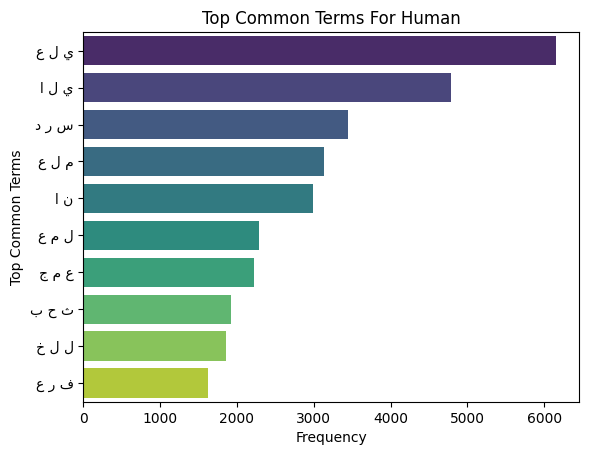

C:\Users\hanee\AppData\Local\Temp\ipykernel_24740\1456529549.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels,palette="viridis")


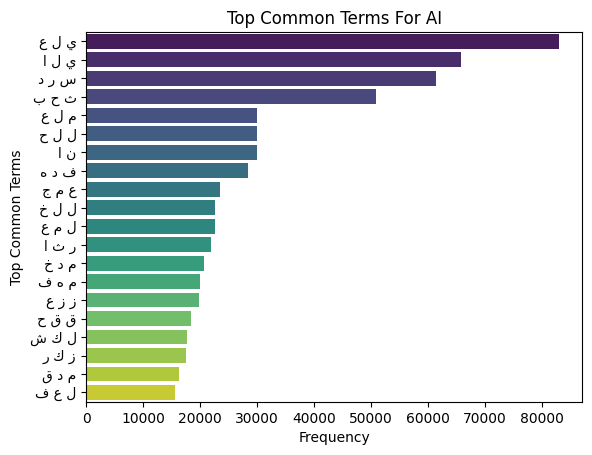

In [24]:
def get_most_common_terms(texts, top_k, title="", filename=None):
    if filename:
        save_path = f"../reports/figures/{filename}.png"
        if os.path.exists(save_path):
            print(f"Common Terms figure already exists: {save_path}")
            return
    word = " ".join(texts).split()
    freq_dist = Counter(word).most_common(top_k)
    labels = [" ".join(i) for i, _ in freq_dist]
    counts = [count for _, count in freq_dist]
    sns.barplot(x=counts, y=labels,palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Top Common Terms")
    if filename:
        save_path = f"../reports/figures/{filename}.png"
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.show()

get_most_common_terms(newdf[newdf['label']=="human"]["clean_text_stemmed"], top_k=10, title="Top Common Terms For Human",filename="commonTermsForHuman")
get_most_common_terms(newdf[newdf['label']=="ai"]["clean_text_stemmed"], top_k=20, title="Top Common Terms For AI",filename="commonTermsForAI")

# Data Exploration

In [25]:
newdf

,text,label,clean_text,clean_text_stemmed,avg_word_len,sentence_len,type_token_ratio,stopword_ratio,punctuation_ratio
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,human,كثيرا ما ارتبطت المصادر التاريخيه في الاندلس خ...,ربط صدر ارخ دلس خصه كتب رجم هرس رمج وغر درس حي...,3.105263,95,0.736842,0.031579,0.007712
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,human,يعد العامل الثقافي احد ابرز الاسباب التي يعزي ...,يعد عمل ثقف احد برز سبب يعز سقط دول وحد حتي ان...,3.152381,105,0.790476,0.095238,0.002299
2,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,human,شكلت تلك الجهود والمساعي الرايده التي قام بها ...,شكل جهد سعي ريد قده ثور خلل رحل اول (1954-1956...,3.459770,174,0.683908,0.028736,0.016774
3,يقوم المقال على اشكالية الضرائب الغير شرعية في...,human,يقوم المقال علي اشكاليه الضرايب الغير شرعيه في...,يقم قال علي شكل ضريب غير شرع خلف رحل دول ربط و...,3.189474,95,0.694737,0.147368,0.007557
4,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,human,تتفق المصادر التاريخيه المتوفره حول موضوع تطور...,تفق صدر ارخ توفر حول وضع تطر حرك وطن جزير نهي ...,3.436364,110,0.900000,0.063636,0.010267
...,...,...,...,...,...,...,...,...,...
36535,تُعتبر اللغة الشعرية عند المتنبي ظاهرة فريدة ف...,ai,تعتبر اللغه الشعريه عند المتنبي ظاهره فريده في...,عبر لغه شعر تنب ظهر فرد ارخ ادب عربي، مزج تقن ...,3.333333,84,0.809524,0.059524,0.013774
36536,"يعتبر ""مفتاح العلوم"" للسكاكي من أبرز المراجع ف...",ai,"يعتبر ""مفتاح العلوم"" للسكاكي من ابرز المراجع ف...","عبر ""مفتاح علوم"" سكك برز رجع درس نصه دول ضمن ق...",3.292453,106,0.735849,0.113208,0.022026
36537,"البحث يتناول أهمية الأداة اللغوية ""حتى"" في الخ...",ai,"البحث يتناول اهميه الاداه اللغويه ""حتي"" في الخ...","بحث نول اهم اده لغي ""حتي"" خطب حجج لدي بشر ابرا...",3.423077,104,0.750000,0.038462,0.034858
36538,يتناول البحث موضوع هوية المعنى الشعري في سياق ...,ai,يتناول البحث موضوع هويه المعني الشعري في سياق ...,نول بحث وضع هوه عني شعر سيق بلغ جديده، ركز علي...,3.255319,94,0.765957,0.021277,0.012531
